### The purpose of this notebook is to prepare the heightmap for the spatial MCA. 

For this we need:
- AHN heightmap
- Raster that represents the other rasters that will go into the smca (to get the raster features from)


In [10]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
import rasterio as rio
import rioxarray
from scipy.ndimage import gaussian_filter
from rasterio.fill import fillnodata
from rasterio.plot import show

In [3]:
# Load the rasters
# Note that the heightmap should be the filled version which was generated in the staringreeks notebook.

heightmap = rio.open('./Data/heightmap_filled.tif')
features_raster = rio.open('./Data/kriged_groundwater.tif') # Can be any raster with the same extent and resolution as the other rasters that will be used in the smca.


/home/vscode/.local/lib/python3.12/site-packages/matplotlib/colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


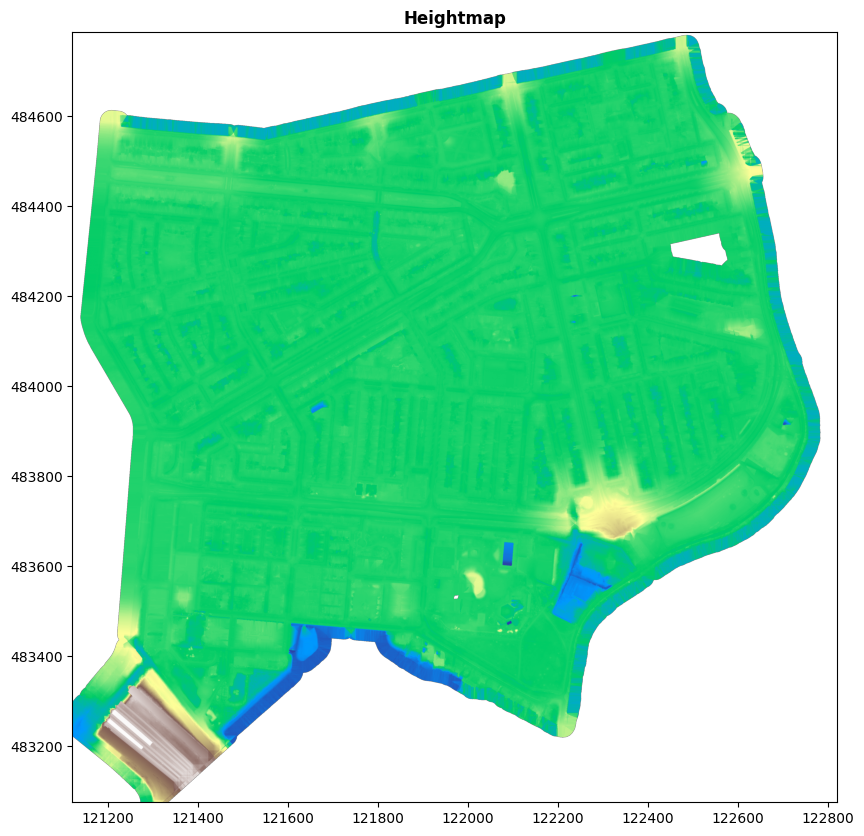

<Axes: title={'center': 'Heightmap'}>

In [19]:
# Plot the heightmap
plt.figure(figsize=(10, 10))
show(heightmap, cmap='terrain', title='Heightmap')

In [1]:
def blur_raster(input_path, output_path, blur_radius):
    # Load the raster file
    with rio.open(input_path) as src:
        # Read raster data and metadata
        raster_data = src.read(1)  # Assuming single band
        meta = src.meta.copy()

        # Calculate sigma for Gaussian blur based on blur distance
        sigma = blur_radius / 2.0

        # Apply Gaussian blur
        blurred_data = gaussian_filter(raster_data, sigma=sigma)
        
        # Update metadata for the output raster
        meta.update(dtype=rio.float32, count=1, nodata=None)

        # Write the blurred raster to a new file
        with rio.open(output_path, 'w', **meta) as dst:
            dst.write(blurred_data, 1)

    return blurred_data

In [ ]:
spatial_resolution = heightmap.res[0]  # Assuming square pixels
blur_distance = 20  # Distance in meters for the blur

# Calculate blur radius in pixels
blur_radius = blur_distance / spatial_resolution

# Call the blur function
input_path = "./Data/heightmap_filled.tif"
output_path = "./Data/heightmap_blurred.tif"

blurred_heightmap = blur_raster(input_path, output_path, blur_radius)